In [1]:
%cd motionmapperpyOther

!python setup.py install

%cd ..

C:\Users\18313\Official_test_monkey\motionmapperpyOther
running install
running bdist_egg
running egg_info
writing motionmapperpy.egg-info\PKG-INFO
writing dependency_links to motionmapperpy.egg-info\dependency_links.txt
writing requirements to motionmapperpy.egg-info\requires.txt
writing top-level names to motionmapperpy.egg-info\top_level.txt
reading manifest file 'motionmapperpy.egg-info\SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'motionmapperpy.egg-info\SOURCES.txt'
installing library code to build\bdist.win-amd64\egg
running install_lib
running build_py
creating build\bdist.win-amd64\egg
creating build\bdist.win-amd64\egg\motionmapperpy
copying build\lib\motionmapperpy\mmutils.py -> build\bdist.win-amd64\egg\motionmapperpy
copying build\lib\motionmapperpy\motionmapper.py -> build\bdist.win-amd64\egg\motionmapperpy
copying build\lib\motionmapperpy\setrunparameters.py -> build\bdist.win-amd64\egg\motionmapperpy
copying build\lib\motionmapperpy\wavelet.py -> bui

C:\Users\18313\anaconda3\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
C:\Users\18313\anaconda3\lib\site-packages\setuptools\command\easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
zip_safe flag not set; analyzing archive contents...
error: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\users\\18313\\anaconda3\\lib\\site-packages\\motionmapperpy-1.0-py3.9.egg'


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import pickle 

import glob, os, sys

import time, copy
from datetime import datetime
import hdf5storage

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# from moviepy.editor import VideoClip, VideoFileClip
# from moviepy.video.io.bindings import mplfig_to_npimage

from tqdm import tqdm 

from scipy.ndimage import median_filter

from matplotlib import rc
rc('animation', html='jshtml')

from pythonlib.dataset.dataset import Dataset
from pythonlib.dataset.dataset_preprocess.general import preprocessDat



In [4]:
import motionmapperpy as mmpy

projectPath = 'content/trial1_mmpy'

# This creates a project directory structure which will be used to store all motionmappery pipeline
# related data in one place.

mmpy.createProjectDirectory(projectPath)

Skipping, path already exists : content/trial1_mmpy
Skipping, path already exists : content/trial1_mmpy/Projections
Skipping, path already exists : content/trial1_mmpy/TSNE_Projections
Skipping, path already exists : content/trial1_mmpy/TSNE
Skipping, path already exists : content/trial1_mmpy/UMAP


In [ ]:
'''with open('data_032921/Pancho-arc2-formodeling-210329_014648/dat.pkl', 'rb') as f:
    content = pickle.load(f)
content'''

In [ ]:
#content.head()

In [ ]:
# animal = "Red"

In [ ]:
''''if animal == "Red":
    path_list = [
        "data_032921/Red-lines5-formodeling-210329_005719",
        "data_032921/Red-arc2-formodeling-210329_005550",
        "data_032921/Red-shapes3-formodeling-210329_005200",
        "data_032921/Red-figures89-formodeling-210329_005443"
    ]
elif animal=="Pancho":
    path_list = [
        "data_032921/Pancho-lines5-formodeling-210329_014835",
        "data_032921/Pancho-arc2-formodeling-210329_014648",
        "data_032921/Pancho-shapes3-formodeling-210329_002448",
        "data_032921/Pancho-figures89-formodeling-210329_000418"
    ]
append_list = None

D = Dataset(path_list, append_list)''''

In [5]:
expt = 'gridlinecircle'
path_list = [
    "data_030421/Pancho-gridlinecircle-baseline-210824_002447",
    "data_030421/Pancho-gridlinecircle-circletoline-210828_100027",
    "data_030421/Pancho-gridlinecircle-linetocircle-210828_100152",
    "data_030421/Pancho-gridlinecircle-lolli-210903_094051",
]
append_list = None

D = Dataset(path_list, append_list)

----------------
Currently loading: data_030421/Pancho-gridlinecircle-baseline-210824_002447
Loaded metadat:
{'sketchpad_edges': array([[-311.84, -224.8 ],
       [ 311.84,  429.6 ]]), 'metadat_probedat': {'sdate': 210820, 'edate': 210821, 'strokmodel_kind': None, 'strokmodel_tstamp': None, 'datecategories': {'210820': 1, '210821': 1}, 'dates_for_summary': [], 'matchedstrokes': None, 'exptnames': ['gridlinecircle1', 'gridlinecircle2'], 'T1': [], 'G1': [], 'G2': [], 'G3': [], 'G4': [], 'description': '', 'finalized': False, 'good_expt': True, 'expt': 'gridlinecircle', 'task_train_test': {'probe1_liketrain': 'train', 'probe1_nostrokeconstraint': 'train', 'probe2_liketrain': 'train', 'probe2_nostrokeconstraint': 'train', 'probe3_hdpos': 'test', 'probe1': 'train', 'probe2': 'train', 'probe3': 'test', 'probe4': 'test', 'train': 'train'}}, 'filedata_params': {'pix_per_deg': array([[ 26.64621164],
       [-26.64621164]]), 'resolution': (1024, 768), 'animal': 'Pancho', 'basedir': '/data2/anima

In [ ]:
D.Dat

In [ ]:
D.Dat.iloc[150]["strokes_beh"][2]

In [ ]:
# Plot 20 random trials, showing behavior
k = 20
fig1, idxs = D.plotMultTrials(k, which_strokes="strokes_beh", return_idxs=True);
SDIR = "trialFigs"

fig1.savefig(f"{SDIR}/trialFig1.pdf")

# Plot those same trials, but coloring by order.
# This is useful for seeing the sequencing of the strokes.
strokes_list = [D.Dat.iloc[i]["strokes_beh"] for i in idxs]
D.plotMultStrokesByOrder(strokes_list, titles=idxs);

# Now plot the stimulus images for these same trials.
fig2 = D.plotMultTrials(idxs, which_strokes="strokes_task");

fig2.savefig(f"{SDIR}/trialFig2.pdf")


# There are many flags to modify the plotting in the above functions. There are also many other plotting function
# that operate on Datasets in pythonlib.dataset.plots


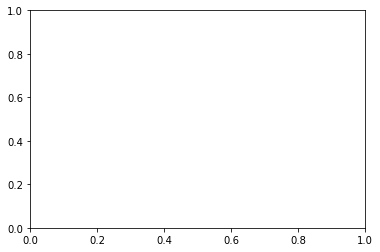

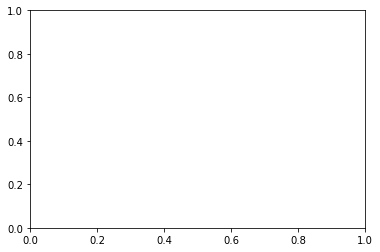

In [6]:
%matplotlib inline

figtmp, axes= plt.subplots()
figtmp

In [ ]:
# These are useful plots showing the overview of the experiment.
# There were four epochs in the experiment gridlinecircle:
# 1. baseline
# 2. linetocircle
# 3. circletoline
# 4. lolli.

# More general notes about how experimental timelines work:
## EXPERIEMNTAL STRUCTURE/TIMELINE
# There are two epochs, each epoch having its set of training and tests tasks. 

# Across days, it goes like this:
# Epoch 1 (Train) --> Epoch 1 (Test) --> Epoch 2 (Train) --> Epoch 2 (Test)

# Ideally, you train seprate models for Epochs 1 and 2, since the idea is that the monkey is laerning different

# Priors in the two epochs (Train) then being tested on similar test tasks (Test).

# To visualize the experimental structure:
# notes:
# - tvalday is time of trial. e..g, the first digit is the day, the value after decimal is fraction of day (not
# exactly from midnight to midnight, but within the "experimental session"). so 2.5 means day 1, halfway through the 
# day (from start of expt to end of expt)
# - to get the actual time, see "tval" qwhich is fraction of day from 0:00 to 24:00


figlist = D.plotOverview()

# you might want to save figlist to view, since hard to see in browser.
SDIR = "tmp" # fill this in. e.g, "/tmp"
for i, fig in enumerate(figlist):
    fig.savefig(f"{SDIR}/overview_{i}.pdf")

In [ ]:
# === Plot random trials, split by experiment and epoch. 
# Note the changes in image structure across expts and epochjs.
import random

SDIR = "splitFigs"
i = 1
k = 10
exptlist = set(D.Dat["expt"])
epochlist = set(D.Dat["epoch"])
for expt in exptlist:
    for epoch in epochlist:
        df = D.Dat[(D.Dat["expt"]==expt) & (D.Dat["epoch"]==epoch)]
        if len(df)==0:
            continue
        inds = random.sample(list(df.index), k)
        
#         fig1 = D.plotMultTrials(inds, which_strokes="strokes_beh")
        strokes_list = [D.Dat.iloc[i]["strokes_beh"] for i in inds]
        fig1,_ = D.plotMultStrokesByOrder(strokes_list, titles=inds);

        fig2 = D.plotMultTrials(inds, which_strokes="strokes_task")
        fig1.suptitle(f"expt {expt}, epoch {epoch}")
        fig2.suptitle(f"expt {expt}, epoch {epoch}")
        
        fig1.savefig(f"{SDIR}/randomSplit_{i}.pdf")
        i = i+1
        fig2.savefig(f"{SDIR}/randomSplit_{j}.pdf")
        j = j+1

    
    '''
        fig = fig1
        fig.savefig(f"{SDIR}/randomSplit{i}.pdf")
        i +=1
        
        fig = fig2
        fig.savefig(f"{SDIR}/randomSplit{i}.pdf")
        i +=1'''
        

In [ ]:
# == Plot a single trial. showing spatial and temporal data
ind = 200
D.plotSingleTrial(ind);

In [ ]:
fig1.savefig(f"{SDIR}/randomSplit_{i}.pdf")


In [ ]:
f"{SDIR}/randomSplit_{i}.pdf"


In [ ]:
fig1

In [ ]:
# Filter to specific task of interest, and plot with overlay behavioral score (hausdorff)
df = D.Dat[(D.Dat["random_task"]==True)]

import random
inds = random.sample(list(df.index), 20)

scores = [D.Dat["hausdorff"].values[i] for i in inds]
D.plotMultTrials(inds, titles=scores);
D.plotMultTrials(inds, titles=scores, which_strokes="strokes_task");

In [ ]:
if False:
    # IGNore for now, not important for most data analyses. just for modeling.
    # recenter tasks (so they are all similar spatial coords)
    D.recenter(method="each_beh_center")

    # interpolate beh (to reduce number of pts)
    D.interpolateStrokes()

    # subsample traisl in a stratified manner to amke sure good represnetaiton
    # of all variety of tasks.
    D.subsampleTrials()

    # Recompute task edges (i..e, bounding box)
    D.recomputeSketchpadEdges()


In [ ]:
########## Ver 1: mix all the data (ignoring what were in same experiments for monkey) and split evenly. 
# Useful if want to train model to capture diversity of behavior
inds_train, inds_val, inds_test = D.splitTrainTest()

In [ ]:
########## Ver 2: Extract train and test tasks exactly as monkey got.
# Do this focusing on a single expeirment and epoch. 
expt = "lines5" 
epoch = 1
inds_train, inds_val, inds_test = D.splitTrainTestMonkey(expt=expt, val = 0.05, epoch=epoch)

In [ ]:
# First pass, try the following experiments and epochs, training four separate models (two animals, two epochs) 
expt = "lines5"
epochlist = [1, 2]
for epoch in epochlist:
    
    # This is new dataset for training a new model.
    inds_train, inds_val, inds_test = D.splitTrainTestMonkey(expt=expt, val = 0.05, epoch=epoch)

In [ ]:
# Use this to print sample size for different groupings of data. 
# - monkey_train_or_test, whether was train or test task for monkey. 
# - expt, experiment
# - epoch, stage within an experiment
# - task_stagecategory, category of image, sort of like an "alphabet" or generative model.
# D.Dat.groupby(["monkey_train_or_test", "expt", "epoch", "task_stagecategory"]).count()
D.Dat.groupby(["monkey_train_or_test", "expt", "epoch"]).count()

In [ ]:
# Plot, separating by train/test split
# == Similar, but split by train ,test, val, to see that
# they should be similar, since they are sampled from same poool.
_, idxs = D.plotMultTrials(inds_train[:20], return_idxs=True);
D.plotMultTrials(idxs, which_strokes="strokes_task")
_, idxs = D.plotMultTrials(inds_val[:20], return_idxs=True);
D.plotMultTrials(idxs, which_strokes="strokes_task")
_, idxs = D.plotMultTrials(inds_test[:20], return_idxs=True);
D.plotMultTrials(idxs, which_strokes="strokes_task")

In [ ]:
# below is for motionmapperpy

In [7]:
parameters = mmpy.setRunParameters()

In [8]:
parameters

{'numProcessors': 12,
 'numPeriods': 25,
 'omega0': 5,
 'samplingFreq': 100,
 'minF': 1,
 'maxF': 50,
 'tSNE_method': 'barnes_hut',
 'perplexity': 32,
 'embedding_batchSize': 20000,
 'maxOptimIter': 100,
 'trainingSetSize': 35000,
 'maxNeighbors': 200,
 'kdNeighbors': 5,
 'training_perplexity': 20,
 'training_numPoints': 10000,
 'minTemplateLength': 1,
 'waveletDecomp': True,
 'useGPU': -1,
 'n_neighbors': 15,
 'train_negative_sample_rate': 5,
 'embed_negative_sample_rate': 1,
 'min_dist': 0.1,
 'umap_output_dims': 2,
 'n_training_epochs': 1000,
 'rescale_max': 100,
 'method': 'TSNE'}

In [9]:
# %%%%%%% PARAMETERS TO CHANGE %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# These need to be revised everytime you are working with a new dataset. #

parameters.projectPath = 'content/trial1_mmpy' #% Full path to the project directory.


#parameters.method = 'UMAP' #% We can choose between 'TSNE' or 'UMAP'

parameters.minF = 1        #% Minimum frequency for Morlet Wavelet Transform

parameters.maxF = 25       #% Maximum frequency for Morlet Wavelet Transform,
                           #% usually equal to the Nyquist frequency for your
                           #% measurements.

parameters.samplingFreq = 100    #% Sampling frequency (or FPS) of data.

parameters.numPeriods = 25       #% No. of dyadically spaced frequencies to
                                 #% calculate between minF and maxF.
comps_above_thresh = 2
parameters.pcaModes = comps_above_thresh #% Number of low-d features.

parameters.numProcessors = -1     #% No. of processor to use when parallel
                                 #% processing for wavelet calculation (if not using GPU)  
                                 #% and for re-embedding. -1 to use all cores 
                                 #% available.

parameters.useGPU = -1           #% GPU to use for wavelet calculation, 
                                 #% set to -1 if GPU not present.

parameters.training_numPoints = 10000   #% Number of points in mini-trainings.


# %%%%% NO NEED TO CHANGE THESE UNLESS MEMORY ERRORS OCCUR %%%%%%%%%%

parameters.trainingSetSize = 5000  #% Total number of training set points to find. 
                                 #% Increase or decrease based on
                                 #% available RAM. For reference, 36k is a 
                                 #% good number with 64GB RAM.

parameters.embedding_batchSize = 30000  #% Lower this if you get a memory error when 
                                        #% re-embedding points on a learned map.

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [ ]:
# %%%%%%% tSNE parameters %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#% can be 'barnes_hut' or 'exact'. We'll use barnes_hut for this tutorial for speed.
parameters.tSNE_method = 'barnes_hut' 

# %2^H (H is the transition entropy)
parameters.perplexity = 32

# %number of neigbors to use when re-embedding
parameters.maxNeighbors = 200

# %local neighborhood definition in training set creation
parameters.kdNeighbors = 5

# %t-SNE training set perplexity
parameters.training_perplexity = 20


In [ ]:
D.Dat.iloc[2]["strokes_beh"][0]

In [ ]:
len(D.Dat.iloc[0]["strokes_beh"][0])
D.Dat.iloc[0]["strokes_beh"][0][1][0:2]

In [ ]:
pip install numpy

In [ ]:
D.Dat.iloc[0]["strokes_beh"][0]
# data = ([])
#piece = {[1,2]}
i = 1
#D.Dat.iloc["strokes_beh"][0][0][0:2]


dataOneStroke = D.Dat.iloc[0]["strokes_beh"][0][0][0:2]


for i in range(i,len(D.Dat.iloc[0]["strokes_beh"][0])):
    temp = D.Dat.iloc[0]["strokes_beh"][0][i][0:2]
    dataOneStroke = np.vstack((dataOneStroke,temp))



In [ ]:
len(D.Dat.iloc[5124]["strokes_beh"])

In [ ]:
type(D.Dat.iloc[0]["strokes_beh"][0][0][0:2])

In [10]:
# x is the trial index there are 5125 trials so x < 5125
x = 0
# y is the stroke index- we dont know how many strokes r there
y = 0
# i is the index of one time frame of one stroke, 
# this index also varies for each trial and stroke
i = 0
#ldataOneStroke = np.array([])
#dataTotal = np.empty([150,1])
ldataOneStroke = []
ldataOneTrial = []
ldataTotal = []
#len(D.Dat)
x=0
for x in range(len(D.Dat)):
    y=0
    ldataOneTrial = []
    for y in range(len(D.Dat.iloc[x]["strokes_beh"])):
        #print(len(D.Dat.iloc[x]["strokes_beh"]))
        i=0
        ldataOneStroke = []
        for i in range(i,len(D.Dat.iloc[x]["strokes_beh"][y])):
            temp = D.Dat.iloc[x]["strokes_beh"][y][i][0:2]
            ldataOneStroke.append(temp)
        #print(len(ldataOneStroke))
        dataOneStroke = np.array(ldataOneStroke)
        #print(dataOneStroke)
        #ldataOneTrial = np.append(ldataOneTrial,ldataOneStroke)
        ldataOneTrial.append(dataOneStroke)
    #print(len(ldataOneTrial))    
    dataOneTrial = np.array(ldataOneTrial)
    ldataTotal.append(dataOneTrial)
    #ldataTotal = np.append(ldataTotal,ldataOneTrial)
    #dataOneTrial = np.vstack((dataOneTrial, dataOneStroke))


C:\Users\18313\AppData\Local\Temp\ipykernel_126452\3701752227.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataOneTrial = np.array(ldataOneTrial)


In [ ]:
ldataOneTrial

In [ ]:
len(ldataTotal)

In [ ]:
ldataTotal[0][0]

In [ ]:
# you dont know if there is more than one stroke in the
# D.Dat.iloc[x]["strokes_beh"][y]
# x is the trial index
# y is the stroke index
plt.figure(figsize=(14,5))
for i in range(60):
#for i in range(len(ldataTotal)):
    for j in range(len(ldataTotal[i])):
        plt.plot(ldataTotal[i][j])

In [11]:
dataTotal = np.array(ldataTotal)

C:\Users\18313\AppData\Local\Temp\ipykernel_126452\2353554022.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataTotal = np.array(ldataTotal)


In [ ]:
dataTotal.shape

In [ ]:
dataTotal[50][1].shape

In [ ]:
'''
datasetname = ['test_monkey']

hdf5storage.savemat('%s/Projections/%s_pcaModes.mat'%(projectPath, datasetname[0]), {'projections':dataTotal})

In [ ]:
for a in range(len(dataTotal)):
        for b in range(len(dataTotal[a])):
            for c in range(len(dataTotal[a][b])):
               dataManipulated = [median_filter(x, size = (2)) for x in dataTotal[a][b][c]]
            
# dataManipulated = [median_filter(x, size=(2,1)) for x in dataTotal]

In [ ]:
len(dataManipulated

In [ ]:
len(dataTotal)

In [ ]:
dataTotal[4].shape

In [12]:
list_trialstroke = []
for trial, x in enumerate(dataTotal):
    print(len(x))
    for strokenum, xx in enumerate(x):
#         print((trial, strokenum))
        list_trialstroke.append((trial, strokenum))
#         print(xx)
#         assert False


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
1
2
1
2
1
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
3
3
3
3
2
2
3
3
5
3
3
2
2
3
3
2
3
3
3
3
3
3
3
2
3
3
3
2
3
4
4
4
3
4
4
4
4
4
4
4
4
4
4
3
3
4
4
4
2
4
4
4
3
4
4
4
4
3
4
4
4
4
4
4
4
4
2
4
3
4
3
4
4
4
4
4
4
4
4
4
4
4
4
3
4
3
4
4
4
3
4
4
3
4
4
4
4
4
4
4
3
3
4
4
4
4
4
4
4
3
5
3
4
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
1
1
1
1
1
2
1
1
2
2
2
3
3
3
4
4
5
2
4
5
4
4
5
4
4
5
5
5
5
5
4
5
3
3
3
4
5
5
5
5
4
5
4
5
5
6
4
5
5
6
6
5
5
7
5
5
5
5
4
6
5
5
5
5
5
5
5
5
5
4
5
5
5
4
5
4
4
5
5
5
5
4
5
4
4
5
5
4
5
5
4
5
5
5
5
5
5
6
5
5
5
5
5
5
4
5
4
6
5
4
5
5
3
3
4
5
4
5
5
5
4
5
5
5
4
6
4
5
3
5
4
5
4
4
1
5
3
3
3
5
5
5
2
1
2
5
4
4
5
5
5
5
5
5
4
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
1
3
2
2
3
3
3
3
2
1
1
2
3
2
3
2
3
1
3
4
4
4
3
4
4
4
3
2
2
3
3
3
4
2
4
4
4
4
3
3
4
4
4
4
4
4
3
3
4
4
4
2
5
4
5
5
4
3
2
4
3
5
5
4
5
5
5
5
6
2
5
5
5
4
4
5
4
5
4
5
3
5
4
4
4
4
4
2
4
4
5
5
5


In [ ]:
list_trialstroke[5435]

In [ ]:
len(independentStrokes)

In [ ]:
len(list_trialstroke)


In [ ]:
idx = 51
trial, strokenum = list_trialstroke[idx]


s = D.Dat.iloc[trial]["strokes_beh"][strokenum]
D.plotMultStrokes([[s]])

#D.plotSingleTrial(trial)

In [13]:
#ndata = len(dataTotal)
ndata = 50


lindependentStrokes = []
for x in range(ndata):
    for y in range(len(dataTotal[x])):
        temp = dataTotal[x][y]
        lindependentStrokes.append(temp)
independentStrokes = np.array(lindependentStrokes)

C:\Users\18313\AppData\Local\Temp\ipykernel_126452\855093700.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  independentStrokes = np.array(lindependentStrokes)


In [ ]:
len(lindependentStrokes)

In [14]:
projections = lindependentStrokes

In [ ]:
len(projections)

In [ ]:
for 

In [ ]:
len(projections)

In [15]:
'''
for i in range(len(projections)):
    hdf5storage.savemat('%s/Projections/Projection_notpca.mat'%(projectPath), {"projections%s"%(i) : projections[i]})
'''
    
hdf5storage.savemat('%s/Projections/test_monkey_notpca.mat'%(projectPath), {"projections" : projections})

    
    

In [16]:
projectionFiles = glob.glob(parameters.projectPath+'/Projections/*test_monkey_notPCA.mat')
print('worked')

worked


In [ ]:
projectionFile = projectionFiles[0]

In [ ]:
projectionFile

In [ ]:
from scipy.io import savemat, loadmat

In [ ]:
pip install mat73

In [ ]:
import mat73

In [ ]:
projections_in = np.array(mat73.loadmat(projectionFile)["projections"])

In [ ]:
projections_in[21].shape

In [ ]:
mmpy.motionmapper.file_embeddingSubSampling(projectionFile, parameters)

In [ ]:
mmpy.subsampled_tsne_from_projections(parameters, parameters.projectPath)


In [ ]:
trainy.shape

In [ ]:
trainy = hdf5storage.loadmat('%s/%s/training_embedding.mat'%(parameters.projectPath, parameters.method))['trainingEmbedding']
m = np.abs(trainy).max()


sigma=2.0
_, xx, density = mmpy.findPointDensity(trainy, sigma, 511, [-m-20, m+20])


fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].scatter(trainy[:,0], trainy[:,1], marker='.', c=np.arange(trainy.shape[0]), s=1)
axes[0].set_xlim([-m-20, m+20])
axes[0].set_ylim([-m-20, m+20])

axes[1].imshow(density, cmap=mmpy.gencmap(), extent=(xx[0], xx[-1], xx[0], xx[-1]), origin='lower')

In [ ]:
#next steps for all data

In [ ]:
#tsne takes 19 mins
tall = time.time()

import h5py
tfolder = parameters.projectPath+'/%s/'%parameters.method

# Loading training data
with h5py.File(tfolder + 'training_data.mat', 'r') as hfile:
    trainingSetData = hfile['trainingSetData'][:].T

# Loading training embedding
with h5py.File(tfolder+ 'training_embedding.mat', 'r') as hfile:
    trainingEmbedding= hfile['trainingEmbedding'][:].T

if parameters.method == 'TSNE':
    zValstr = 'zVals' 
else:
    zValstr = 'uVals'

projectionFiles = glob.glob(parameters.projectPath+'/Projections/*notpca.mat')
for i in range(len(projectionFiles)):
    print('Finding Embeddings')
    t1 = time.time()
    print('%i/%i : %s'%(i+1,len(projectionFiles), projectionFiles[i]))


    # Skip if embeddings already found.
    if os.path.exists(projectionFiles[i][:-4] +'_%s.mat'%(zValstr)):
        print('Already done. Skipping.\n')
        continue

    # load projections for a dataset
    #modifying adding np.array
    projections = np.array(hdf5storage.loadmat(projectionFiles[i])['projections'])

    # Find Embeddings
    zValues, outputStatistics = mmpy.findEmbeddings(projections,trainingSetData,trainingEmbedding,parameters)

    # Save embeddings
    hdf5storage.write(data = {'zValues':zValues}, path = '/', truncate_existing = True,
                    filename = projectionFiles[i][:-4]+'_%s.mat'%(zValstr), store_python_metadata = False,
                      matlab_compatible = True)
    
    # Save output statistics
    with open(projectionFiles[i][:-4] + '_%s_outputStatistics.pkl'%(zValstr), 'wb') as hfile:
        pickle.dump(outputStatistics, hfile)

    del zValues,projections,outputStatistics

print('All Embeddings Saved in %i seconds!'%(time.time()-tall))


In [ ]:
zValues = hdf5storage.loadmat('content/trial1_mmpy/Projections/test_monkey_notpca_zVals.mat')['zValues']

In [ ]:
zValues

In [ ]:
a = hdf5storage.loadmat('content/trial1_mmpy/Projections/test_monkey_notpca_zVals.mat')['zValues']


In [ ]:
a.sort(axis=0)

In [ ]:
a

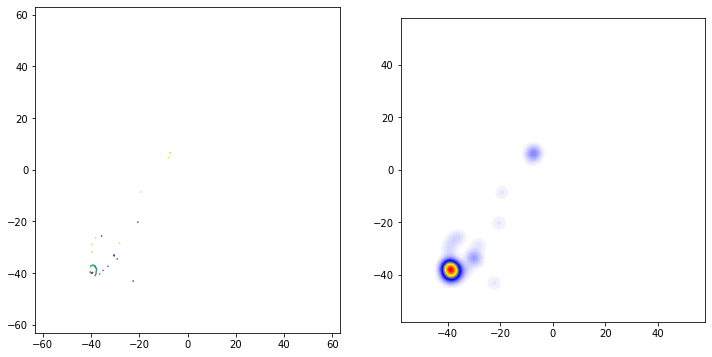

In [280]:
# load all the embeddings
for i in glob.glob(parameters.projectPath+'/Projections/*_%s.mat'%(zValstr)):
  ally = hdf5storage.loadmat(i)['zValues']

m = np.abs(ally).max()

sigma=2.0
_, xx, density = mmpy.findPointDensity(ally, sigma, 610, [-m-15, m+15])


fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].scatter(ally[:,0], ally[:,1], marker='.', c=np.arange(ally.shape[0]), s=1)
axes[0].set_xlim([-m-20, m+20])
axes[0].set_ylim([-m-20, m+20])

axes[1].imshow(density, cmap=mmpy.gencmap(), extent=(xx[0], xx[-1], xx[0], xx[-1]), origin='lower')

In [ ]:
density.shape

In [396]:
array = [1,2]

In [399]:
copyarray = array.copy()

In [401]:
array.append(3)

In [402]:
copyarray


[1, 2]

In [ ]:
#watershed things

1/1 Loading embedding for Projections\test_monkey_notpca 0.00 seconds.
Starting watershed transform...
wshed [[ 3  3  3 ... 12 12 12]
 [ 3  3  3 ... 12 12 12]
 [ 3  3  3 ... 12 12 12]
 ...
 [ 8  8  8 ... 12 12 12]
 [ 8  8  8 ... 12 12 12]
 [ 8  8  8 ... 12 12 12]]
459 [ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 

Assigning watershed regions...
THIS IS PRINGINT [[118 171]
 [187  79]
 [197 199]
 [ 95 110]
 [ 95 110]
 [ 94  97]
 [152 124]
 [146 131]
 [146 130]
 [145 132]
 [ 96  95]
 [132 109]
 [ 96  95]
 [121 101]
 [ 96  95]
 [ 97  95]
 [ 98  96]
 [114  94]
 [ 99  97]
 [104  90]
 [106  93]
 [106  95]
 [107  98]
 [107 100]
 [107 102]
 [107 103]
 [107 105]
 [106 106]
 [105 107]
 [105 108]
 [104 108]
 [104 109]
 [104 109]
 [103 110]
 [102 110]
 [102 111]
 [101 111]
 [100 111]
 [ 99 111]
 [ 98 111]
 [ 97 111]
 [ 96 110]
 [ 96 110]
 [ 95 109]
 [ 95 109]
 [ 95 108]
 [ 95 108]
 [ 95 109]
 [ 98 138]
 [ 98 154]
 [106 167]
 [157 156]
 [203 260]
 [263 329]
 [267 339]
 [267 340]
 [266 340]
 [266 340]]
ANOTHER [ 7  1  8  2  2  2  3  3  3  3  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  4  5  7  6  9 10 10 10 10 10]
JUST TO CONFIRM 58
WHAT'S THIS TSNE
Calculating velocity distributions...
Initialization 0
Initialization converged: True
	 tem

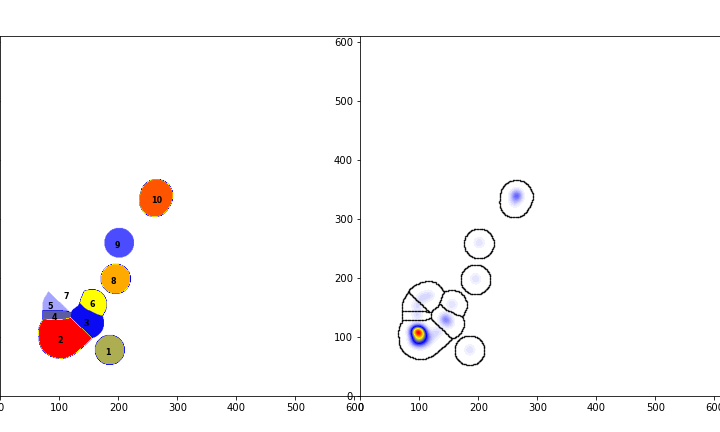

In [408]:

#modifying startsigma because 4.2 was too high
#modifying minimum_regions because 50 was too high
startsigma = 1.0 if parameters.method == 'TSNE' else 2.0
mmpy.findWatershedRegions(parameters, minimum_regions=10, startsigma=startsigma, pThreshold=[0.33, 0.67],
                     saveplot=True, endident = '*_notpca.mat')

from IPython.display import Image
Image(glob.glob('%s/%s/zWshed*.png'%(parameters.projectPath, parameters.method))[0])

In [409]:
wshedfile = hdf5storage.loadmat('%s/%s/zVals_wShed_groups.mat'%(parameters.projectPath, parameters.method))


In [410]:
wshedfile

{'LL': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'density': array([[0.00000000e+00, 8.46960292e-19, 0.00000000e+00, ...,
         9.60968650e-19, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 8.43645239e-19, 0.00000000e+00, ...,
         1.12157319e-18, 0.00000000e+00, 6.83764507e-20],
        [0.00000000e+00, 8.19030711e-19, 0.00000000e+00, ...,
         1.28459741e-18, 0.00000000e+00, 1.42841356e-19],
        ...,
        [0.00000000e+00, 7.81004567e-19, 0.00000000e+00, ...,
         5.48095339e-19, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 8.11146996e-19, 0.00000000e+00, ...,
         6.68812494e-19, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 8.34447957e-19, 0.00000000e+00, ...,
         8.08185589e-19, 0.00000000e+00, 0.00000000e+00]]),
 'groups': array([], shape=(10, 1, 

In [416]:
aa = wshedfile['indexesWatershedRegions'][0]

In [418]:
aa[1]

1

In [374]:
aa[0].min()

53

In [379]:
wshedfile['LL']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [344]:
wshedfile['v']

array([[ 0.        , 21.84342611, 22.859937  , 25.79618949,  0.        ,
         2.35057441, 12.31050615,  1.88297656,  0.20171142,  0.41863946,
        11.7103329 ,  7.26081599,  7.26081599,  4.86994892,  4.86994892,
         0.12849182,  0.13970816,  3.16427089,  2.90679968,  1.56937254,
         0.51642081,  0.50565638,  0.44976404,  0.40207253,  0.36302643,
         0.34199985,  0.33630108,  0.33826923,  0.19499118,  0.14537946,
         0.12924704,  0.12322124,  0.11566594,  0.11957165,  0.14046879,
         0.16963453,  0.1985667 ,  0.22186571,  0.21122326,  0.17958404,
         0.15121446,  0.13678911,  0.13275006,  0.12665797,  0.11208548,
         0.08271907,  0.03879341,  0.04075388,  5.71738311,  2.91015799,
         3.00273492, 10.11621005, 21.65688172, 17.45484988,  2.04902316,
         0.08363753,  0.05098831,  0.02600972]])

In [ ]:
a = hdf5storage.loadmat(projectionFiles[i])['projections']

In [ ]:
b= np.array(a)

In [ ]:
a = np.cumsum(wshedfile['zValLens'][0].flatten())

In [263]:
np.cumsum(wshedfile['zValLens'][0].flatten())

array([58], dtype=int32)

(58, 6)


Text(0.5, 0, 'Time (min)')

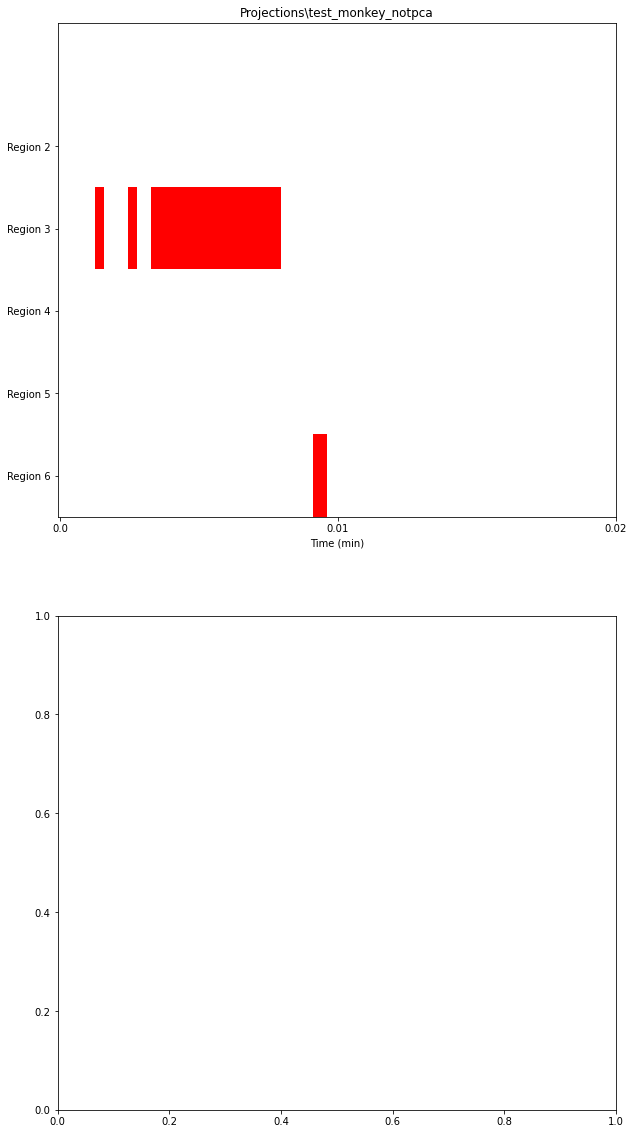

In [186]:
wshedfile = hdf5storage.loadmat('%s/%s/zVals_wShed_groups.mat'%(parameters.projectPath, parameters.method))

wregs = wshedfile['watershedRegions'].flatten()
ethogram = np.zeros((wregs.max()+1, len(wregs)))

for wreg in range(1, wregs.max()+1):
  ethogram[wreg, np.where(wregs==wreg)[0]] = 2.0


ethogram = np.split(ethogram.T, np.cumsum(wshedfile['zValLens'][0].flatten())[:-1])


fig, axes = plt.subplots(2, 1, figsize=(10,20))

for e, name, ax in zip(ethogram, wshedfile['zValNames'][0], axes.flatten()):
  print(e.shape)
  ax.imshow(e.T, aspect='auto', cmap=mmpy.gencmap())
  ax.set_title(name[0][0])
  ax.set_yticks([i for i in range(1, wregs.max()+1, 1)])
  ax.set_yticklabels(['Region %i'%(j+1) for j in range(1, wregs.max()+1, 1)])

  xticklocs = [60*i for i in range(3)]
  ax.set_xticks(xticklocs)
  ax.set_xticklabels([j/(6000) for j in xticklocs])

ax.set_xlabel('Time (min)')

In [ ]:
#the visualization part:

In [268]:
wshedfile

{'LL': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'density': array([[2.33201387e-15, 3.26129547e-15, 4.55289412e-15, ...,
         8.28012093e-16, 1.17666884e-15, 1.66296740e-15],
        [3.25150720e-15, 4.54793207e-15, 6.34685883e-15, ...,
         1.15675838e-15, 1.64129697e-15, 2.31802524e-15],
        [4.51701546e-15, 6.31863279e-15, 8.81566610e-15, ...,
         1.60927241e-15, 2.28089903e-15, 3.21955648e-15],
        ...,
        [8.41018713e-16, 1.17466424e-15, 1.64328232e-15, ...,
         2.95069387e-16, 4.23672983e-16, 6.00608828e-16],
        [1.18614739e-15, 1.65772409e-15, 2.31690047e-15, ...,
         4.18410128e-16, 5.97885668e-16, 8.46556158e-16],
        [1.66633473e-15, 2.32975072e-15, 3.25398595e-15, ...,
         5.90043849e-16, 8.40382771e-16, 1.18870086e-15]]),
 'groups': array([], shape=(5, 1, 0

In [ ]:
len(wshedfile['zValues'])

In [ ]:
zValues.shape

In [ ]:
list_trialstroke[19]

In [170]:
# function to divide the strokes in areas
def divide_strokes(zValues, num, origin):
    #xs = zValues[:,0]
    #arrx = np.linspace(xs.min(), xs.max(), num)
    #print(origin)
    arrx = np.linspace(origin, -origin, num)
    #print(arrx[0])
    #ys = zValues[:,1]
    #arry = np.linspace(ys.min(), ys.max(), num)
    arry = np.linspace(-origin, origin, num)
    #print(arry)
    return arrx, arry

In [171]:
# function to choose an stroke from the index list and return it
def choose_stroke(lsindex):
    import random
    r = random.randint(0, len(lsindex)-1)
    return lsindex[r]

In [172]:
# function to return array of indexes of the strokes contained in a certain grid of density
def strokes_in_area(zValues,arrx, arry, nx, ny):
    #print("ZVALUES:")
    #print(zValues)
    lsindex = []
    #nx = nare
    #ny = -1 -narea
    upx = arrx[nx+1]
    #print("upx",upx)
    lwx = arrx[nx]
    #print("lwx",lwx)
    upy = arry[ny]
    #print("upy", upy)
    lwy = arry[ny+1]
    #print("lwy", lwy)
 
    for i in range(len(zValues)):
        if (zValues[i][0]<=upx and zValues[i][0]>lwx and zValues[i][1]<=upy and zValues[i][1]>lwy):
            #print(i)
            #print(narea)
            #print("arrx",arrx[nx+1])
            #print("arry", arry[nx])
            #print(zValues[i])
            lsindex.append(zValues[i])
    return lsindex


In [174]:
# function to plot a single stroke given the index and ax in the subplot
def plot_stroke(indx, ax):
    trial, strokenum = list_trialstroke[indx]
    g = D.Dat.iloc[trial]["strokes_beh"][strokenum]
    strokePlots.plotDatStrokes([g],ax, clean_ordered= True)


In [175]:
# function to get index given the array stroke
def get_sindex(zValues, arrst):
    indx = np.where(np.all(zValues==arrst, axis=1))
    if len(indx[0]>1):
        return indx[random.randint(0, len(indx)-1)][0]
    else:
        return indx[0]

In [178]:
import random

In [180]:
from pythonlib.drawmodel import strokePlots

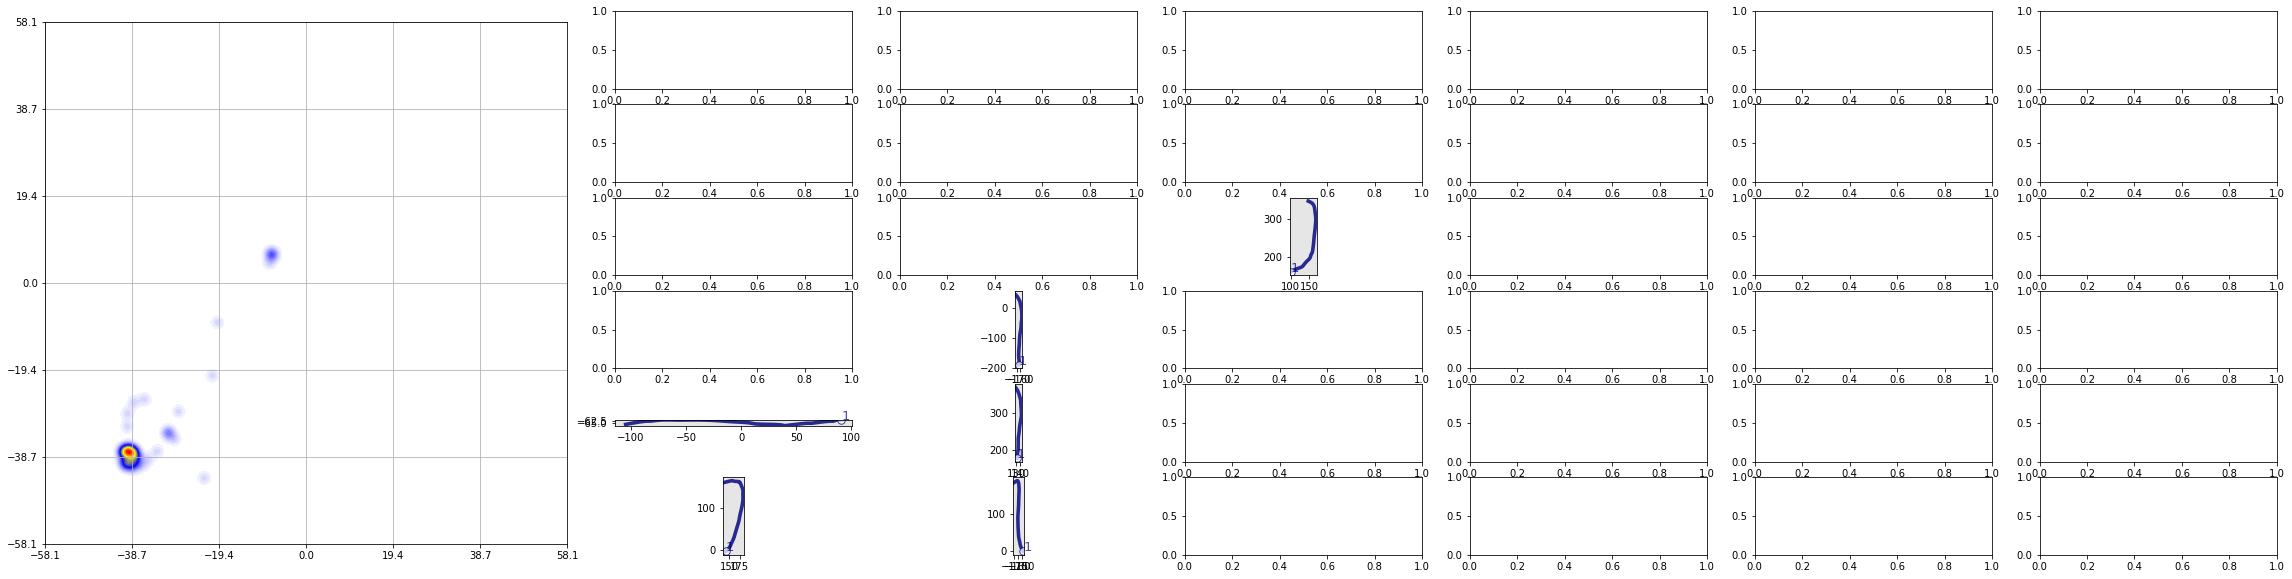

"\nh5ind = 0\ntstart = 0\nconnections = [np.arange(6,10), np.arange(10,14), np.arange(14,18), np.arange(18,22), np.arange(22,26), np.arange(26,30),\n              [2,0,1],[0,3,4,5], [31,3,30]]\n\ndef animate(t):\n  t = int(t*clips[h5ind].fps)+tstart\n  axes[1].clear()\n  im = axes[1].imshow(clips[h5ind].get_frame(t/clips[h5ind].fps), cmap='Greys', origin='lower')\n  for conn in connections:\n      axes[1].plot(h5s[h5ind][t, conn, 0], h5s[h5ind][t, conn, 1], 'k-')\n  axes[1].axis('off')\n  sc.set_offsets(zValues[20000*h5ind+t])\n  return mplfig_to_npimage(fig) #im, ax\n\n\nanim = VideoClip(animate, duration=2) # will throw memory error for more than 100.\nplt.close()\nanim.ipython_display(fps=15, loop=True, autoplay=True, maxduration=120)\n\n"

In [301]:
from moviepy.editor import VideoClip, VideoFileClip
   
wshedfile = hdf5storage.loadmat('%s/%s/zVals_wShed_groups.mat'%(parameters.projectPath, parameters.method))
   
try:
 tqdm._instances.clear()
except:
 pass

#fig, axes = plt.subplots(1, 1, figsize=(10,5))
zValues = wshedfile['zValues']
m = np.abs(zValues).max()

sigma=1.
_, xx, density = mmpy.findPointDensity(zValues, sigma, 511, [-m-15, m+15])

#axes.imshow(density, cmap=mmpy.gencmap(), extent=(xx[0], xx[-1], xx[0], xx[-1]), origin='lower')

#axes.axis('off')
#axes[0].set_title('Method : %s'%parameters.method)

#sc = axes.scatter([],[],marker='o', color='k', s=5)

#idx = 9
#trial,strokenum = list_trialstroke[idx]
#s = D.Dat.iloc[trial]["strokes_beh"][strokenum]
#D.plotMultStrokes([[s]])
#fig, axes = plt.subplots(1, 1, figsize=(10,5))
#axes.imshow(density, cmap=mmpy.gencmap(), extent=(xx[0], xx[-1], xx[0], xx[-1]), origin='lower')

'''
ax00
ax02 x = -40, y = 60
ax03 x = -20, y = 60
ax04 x = 0, y = 60
ax05
ax06
ax07
ax12 x = -40, y = 40
ax13

.
.
ax57
'''

uplim = round((xx[-1]),-1)

rows = int(uplim/10)
dcol = int(round(rows/3))
cols = rows +dcol

fig, axes = plt.subplots(rows, cols, figsize=(40,10))

ax00 = plt.subplot2grid((rows,cols),(0,0),rowspan=rows, colspan=dcol)

ax00.imshow(density, cmap=mmpy.gencmap(), extent=(xx[0],xx[-1],xx[0], xx[-1]), origin='lower')
#ax00.grid()
#print(rows)
#print(cols)
#print(dcol)
arrx, arry = divide_strokes(zValues, rows+1, xx[0])

ax00.set_xticks(arrx)
ax00.set_yticks(arry)

ax00.grid()
 #print(arrx)
#print(arry)

#keep calling functions to plot stuff
for r in range(rows):
    for c in range(dcol, cols):
      #print(i)
       #print(r)
         #print(c)
        ax = plt.subplot2grid((rows, cols,), (r,c))
        #y = int(uplim - r*20)
        #print(y)
        #x = int(-uplim + (c-1)*20)
        #print(x)
        ls = strokes_in_area(zValues, arrx, arry, c-2, r)
        #print(ls)
        if (len(ls)>0):
            st = choose_stroke(ls)
            #print(st)
            idx = get_sindex(zValues, st)
            #print(idx[0])
            plot_stroke(idx, ax)


'''
ax02 = plt.subplot2grid((6,8),(0,2),colspan=1)
plot_stroke(3,ax02)

ax03 = plt.subplot2grid((6,8),(0,3),colspan=1)
plot_stroke(4,ax03)

ax04 = plt.subplot2grid((6,8),(0,4),colspan=1)
plot_stroke(13,ax04)

ax05 = plt.subplot2grid((6,8),(0,5),colspan=1)
plot_stroke(15,ax05)


ax06 = plt.subplot2grid((6,8),(0,6),colspan=1)
plot_stroke(17,ax06)


ax07 = plt.subplot2grid((6,8),(0,7),colspan=1)
plot_stroke(19,ax07)

ax12 = plt.subplot2grid((6,8),(1,2),colspan=1)
plot_stroke(23,ax13)
'''
plt.show()



'''
def show_stroke(z):
    fig, axes = plt.subplots(1, 1, figsize=(10,5))
    axes.imshow(density, cmap=mmpy.gencmap(), extent=(xx[0], xx[-1], xx[0], xx[-1]), origin='lower')
    sc = axes.scatter([],[],marker='o', color='k', s=3)
    idx = z
    trial,strokenum = list_trialstroke[z]
    s = D.Dat.iloc[trial]["strokes_beh"][strokenum]
    D.plotMultStrokes([[s]])
    sc.set_offsets(zValues[z])


    for z in range (len(zValues)):
        idx = z
        trial,strokenum = list_trialstroke[z]
        s = D.Dat.iloc[trial]["strokes_beh"][strokenum]
        D.plotMultStrokes([[s]])
        sc.set_offsets(zValues[z])


def showing(t):    
    for z in range(len(zValues)):
        show_stroke(z)

'''



#anim = VideoClip(animate, duration=2)
#plt.close()
#anim.ipython_display(fps=15, loop=True, autoplay=True, maxduration=120)



'''
h5ind = 0
tstart = 0
connections = [np.arange(6,10), np.arange(10,14), np.arange(14,18), np.arange(18,22), np.arange(22,26), np.arange(26,30),
              [2,0,1],[0,3,4,5], [31,3,30]]

def animate(t):
  t = int(t*clips[h5ind].fps)+tstart
  axes[1].clear()
  im = axes[1].imshow(clips[h5ind].get_frame(t/clips[h5ind].fps), cmap='Greys', origin='lower')
  for conn in connections:
      axes[1].plot(h5s[h5ind][t, conn, 0], h5s[h5ind][t, conn, 1], 'k-')
  axes[1].axis('off')
  sc.set_offsets(zValues[20000*h5ind+t])
  return mplfig_to_npimage(fig) #im, ax


anim = VideoClip(animate, duration=2) # will throw memory error for more than 100.
plt.close()
anim.ipython_display(fps=15, loop=True, autoplay=True, maxduration=120)

'''

In [203]:
from skimage.segmentation import watershed


In [210]:
wshedfile = hdf5storage.loadmat('%s/%s/zVals_wShed_groups.mat'%(parameters.projectPath, parameters.method))


In [241]:
watershedRegions = np.digitize(zValues, xx)

In [250]:
zValues[1]

array([-22.4886972 , -43.06584412])

In [251]:
xx[187]

-22.40636020862103

In [244]:
watershedRegions

array([[118, 171],
       [187,  79],
       [197, 199],
       [ 95, 110],
       [ 95, 110],
       [ 94,  97],
       [152, 124],
       [146, 131],
       [146, 130],
       [145, 132],
       [ 96,  95],
       [132, 109],
       [ 96,  95],
       [121, 101],
       [ 96,  95],
       [ 97,  95],
       [ 98,  96],
       [114,  94],
       [ 99,  97],
       [104,  90],
       [106,  93],
       [106,  95],
       [107,  98],
       [107, 100],
       [107, 102],
       [107, 103],
       [107, 105],
       [106, 106],
       [105, 107],
       [105, 108],
       [104, 108],
       [104, 109],
       [104, 109],
       [103, 110],
       [102, 110],
       [102, 111],
       [101, 111],
       [100, 111],
       [ 99, 111],
       [ 98, 111],
       [ 97, 111],
       [ 96, 110],
       [ 96, 110],
       [ 95, 109],
       [ 95, 109],
       [ 95, 108],
       [ 95, 108],
       [ 95, 109],
       [ 98, 138],
       [ 98, 154],
       [106, 167],
       [157, 156],
       [203,

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [230]:
watershedRegions = LL[watershedRegions[:,1], watershedRegions[:,0]]

In [233]:
watershedRegions

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 4, 4])

In [227]:
LL =wshedfile["LL"]

In [ ]:
LL[watershedRegions[:,1], watershedRegions[:,0]]

In [205]:
arrw = watershed(-density, connectivity=10)

In [224]:
arrw

array([[2, 2, 2, ..., 7, 7, 7],
       [2, 2, 2, ..., 7, 7, 7],
       [2, 2, 2, ..., 7, 7, 7],
       ...,
       [6, 6, 6, ..., 7, 7, 7],
       [6, 6, 6, ..., 7, 7, 7],
       [6, 6, 6, ..., 7, 7, 7]])

"\nimport glob\nimport matplotlib.pyplot as plt\nimport matplotlib.image as mpimg\n%matplotlib inline\n\nimages = []\nfor img_path in glob.glob('folder/*.png'):\n    images.append(mpimg.imread(img_path))\n\nplt.figure(figsize=(20,10))\ncolumns = 5\nfor i, image in enumerate(images):\n    plt.subplot(len(images) / columns + 1, columns, i + 1)\n    plt.imshow(image)\n"

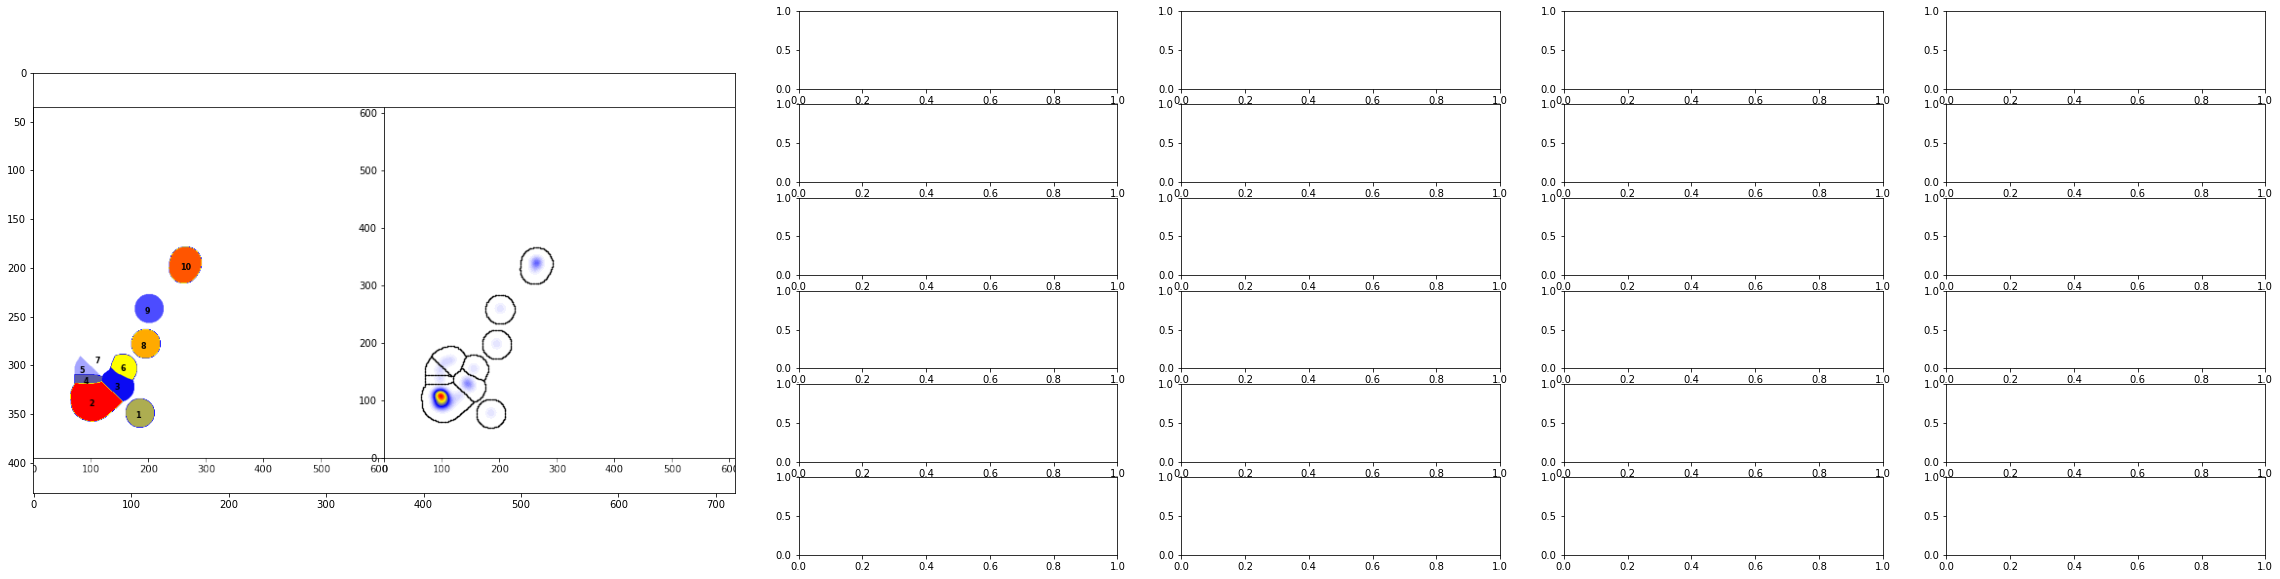

In [420]:
# do the same for watershed
import matplotlib.image as mpimg
#from IPython.display import Image
#Image(glob.glob('%s/%s/zWshed*.png'%(parameters.projectPath, parameters.method))[0])

wshedfile = hdf5storage.loadmat('%s/%s/zVals_wShed_groups.mat'%(parameters.projectPath, parameters.method))

wregions = wshedfile["indexesWatershedRegions"][0]

nregions = wregions.max()

# calculate how many columns and rows
# 10 rows and add more columns as needed
# figure out how to name plot

rows = 10
dcol = int(round(rows/3))
cols = round(nregions/rows) + dcol

fig, axes = plt.subplots(rows, cols, figsize=(40,10))


ax00 = plt.subplot2grid((rows,cols),(0,0),rowspan=rows, colspan=dcol)

ax00.imshow(mpimg.imread(glob.glob('%s/%s/zWshed*.png'%(parameters.projectPath, parameters.method))[0]))

#ax00.set(xlim=(-60, 60))
#ax00.set(ylim = (-60, 60))
#ax00.set_xticks(arrx)

#sc = ax00.scatter([],[],marker='o', color='k', s=3)
#sc.set_offsets(zValues[9])

#keep calling functions to plot stuff

for r in range(len(wregions)):
    ax = plt.subplot2grid((rows, cols), (r, c))
    


'''
#keep calling functions to plot stuff
for r in range(rows):
    for c in range(dcol, cols):
      #print(i)
       #print(r)
         #print(c)
        ax = plt.subplot2grid((rows, cols,), (r,c))
        #y = int(uplim - r*20)
        #print(y)
        #x = int(-uplim + (c-1)*20)
        #print(x)
        ls = strokes_in_area(zValues, arrx, arry, c-2, r)
        #print(ls)
        if (len(ls)>0):
            st = choose_stroke(ls)
            #print(st)
            idx = get_sindex(zValues, st)
            #print(idx[0])
            plot_stroke(idx, ax)
'''
#asda
'''
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('folder/*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
'''

In [423]:
wregions

array([ 7,  1,  8,  2,  2,  2,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  4,  5,  7,
        6,  9, 10, 10, 10, 10, 10])

In [19]:
zValues

array([[-35.63507333, -25.62141639],
       [-22.4886972 , -43.06584412],
       [-20.59501572, -20.28447694],
       [-40.03076553, -37.24605179],
       [-40.03076553, -37.24605179],
       [-40.32059479, -39.57868958],
       [-29.10865671, -34.49528461],
       [-30.4021996 , -33.12694712],
       [-30.37334111, -33.3265835 ],
       [-30.460684  , -32.91715681],
       [-39.76224136, -40.03143311],
       [-33.01736949, -37.34328278],
       [-39.76224136, -40.03143311],
       [-35.01369614, -38.95082181],
       [-39.76224136, -40.03143311],
       [-39.65840149, -39.95575333],
       [-39.54263306, -39.87754822],
       [-36.40935618, -40.31934712],
       [-39.24744415, -39.69106293],
       [-38.28383283, -40.92976522],
       [-38.02999259, -40.48003688],
       [-37.89472012, -39.9928103 ],
       [-37.83076992, -39.54761589],
       [-37.78876491, -39.14774354],
       [-37.72410027, -38.79052278],
       [-37.69238557, -38.4499966 ],
       [-37.80650865, -38.13365132],
 

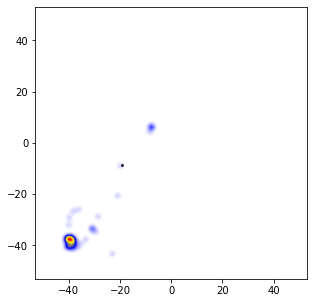

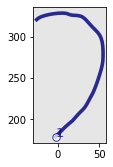

In [45]:
show_stroke(-6)

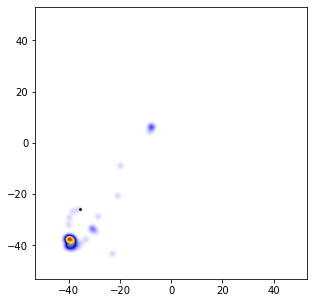

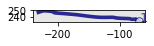

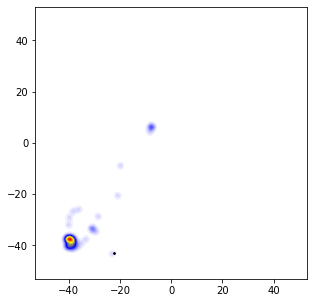

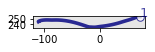

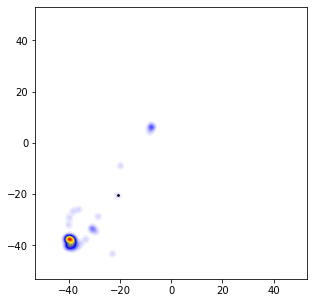

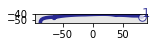

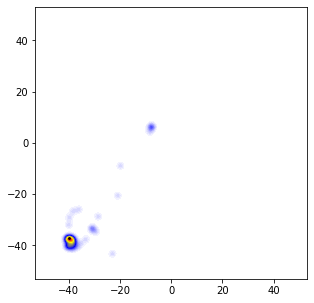

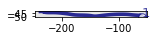

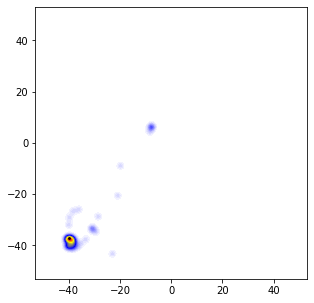

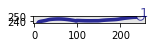

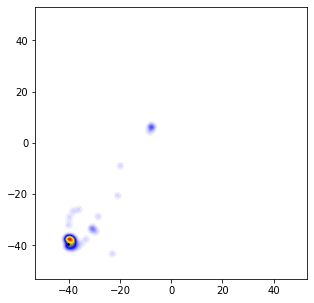

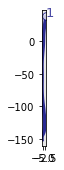

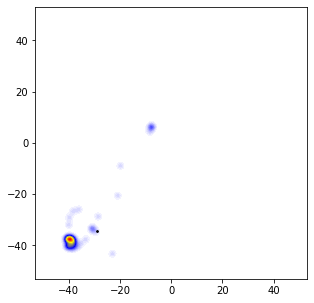

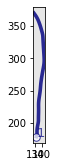

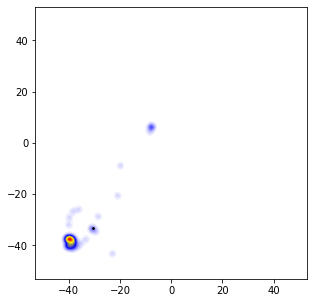

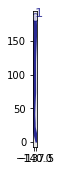

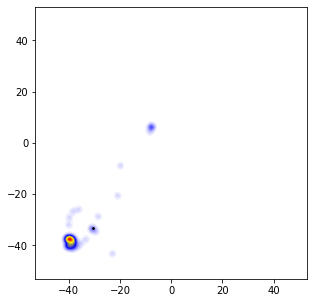

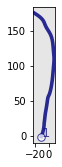

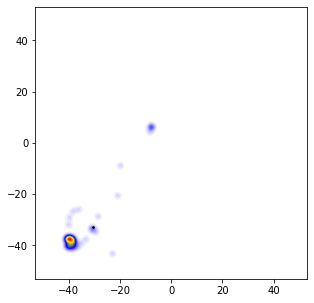

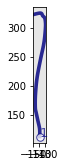

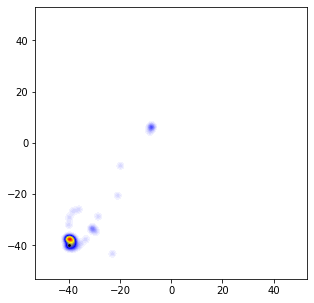

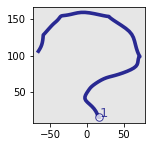

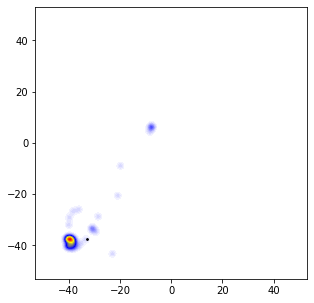

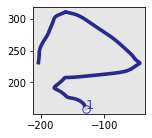

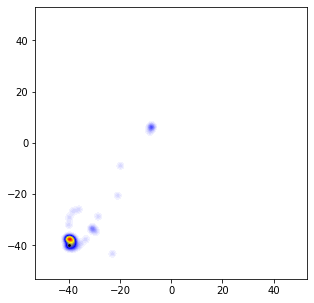

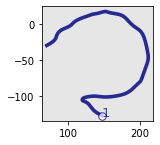

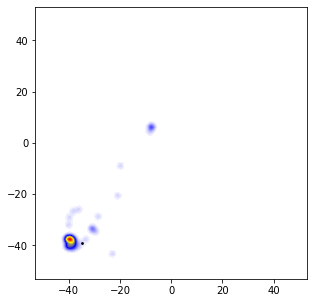

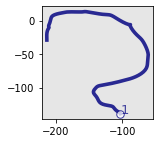

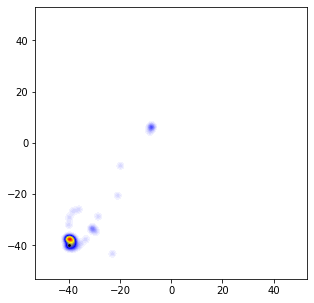

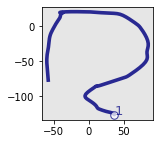

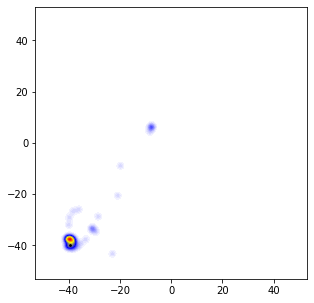

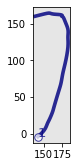

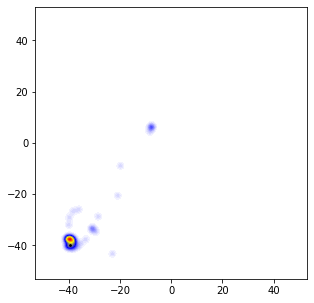

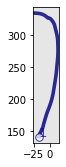

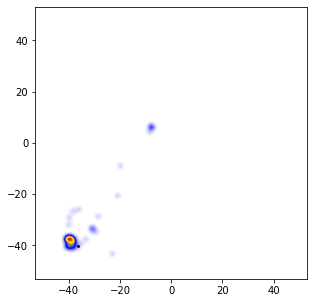

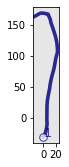

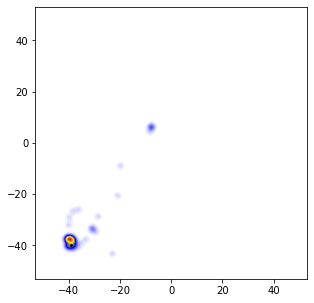

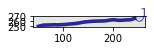

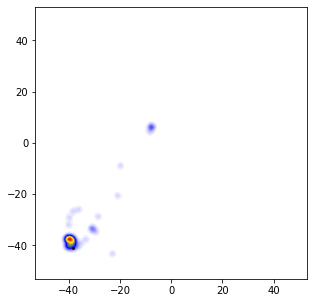

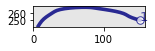

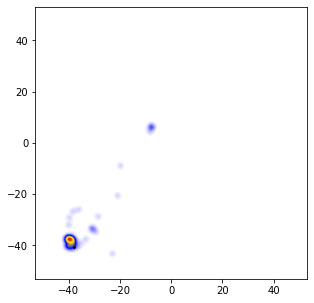

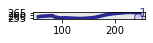

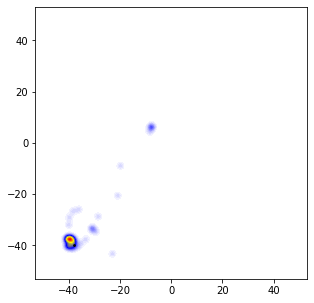

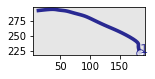

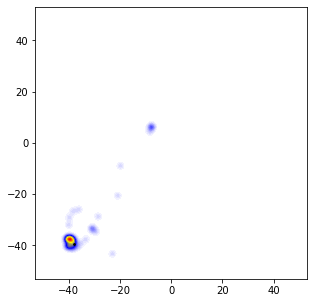

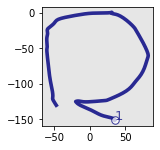

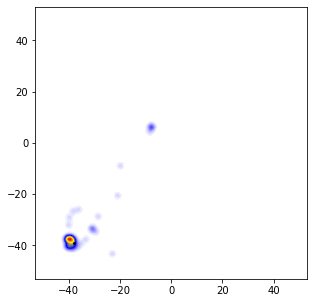

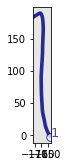

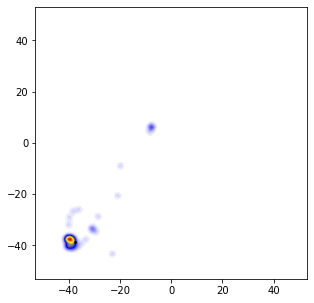

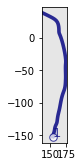

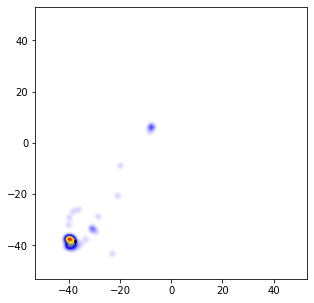

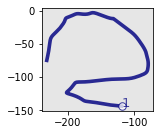

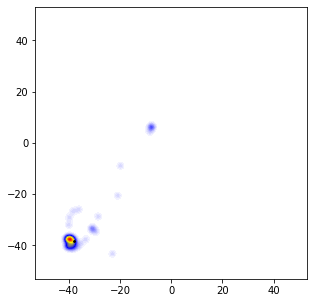

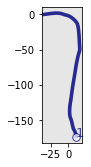

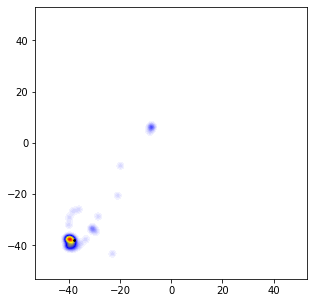

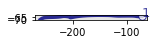

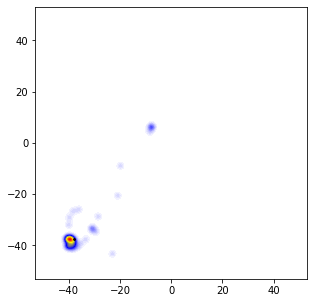

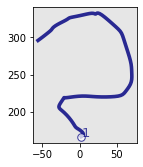

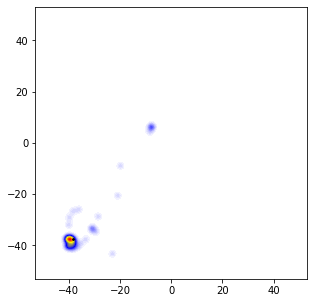

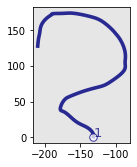

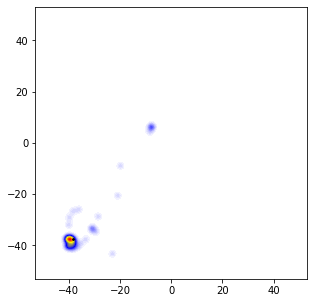

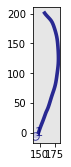

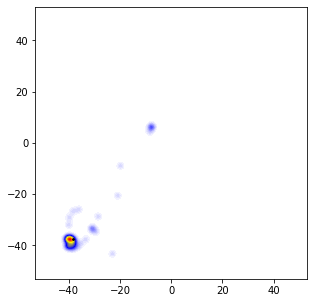

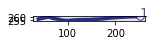

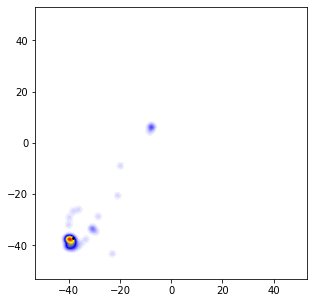

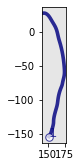

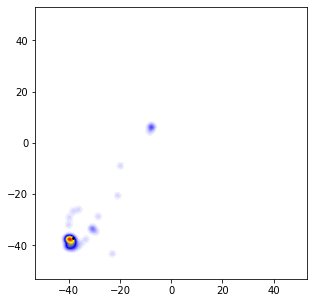

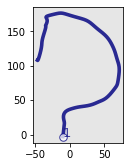

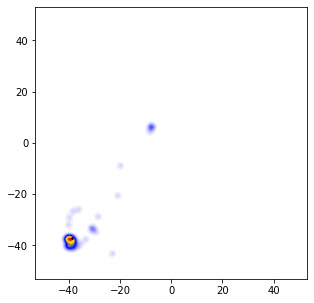

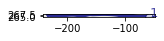

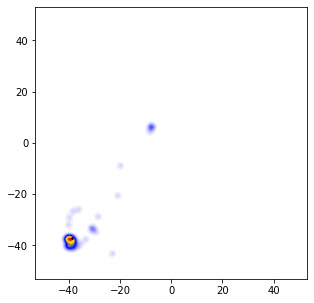

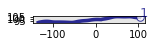

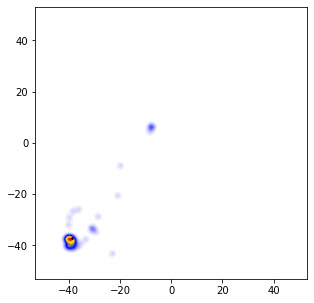

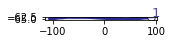

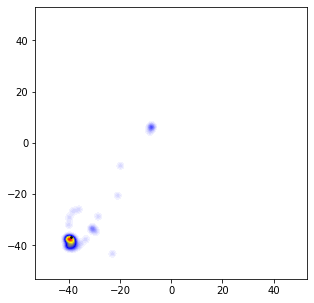

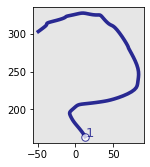

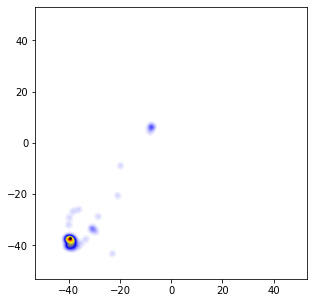

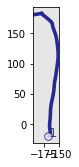

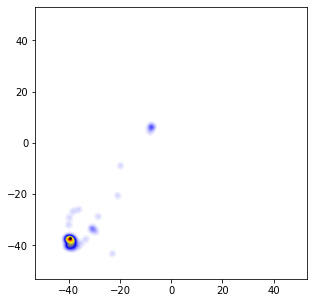

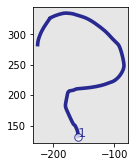

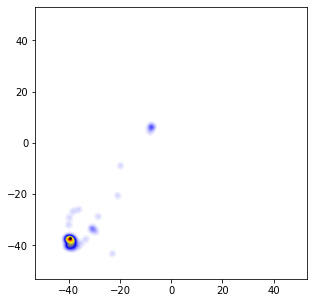

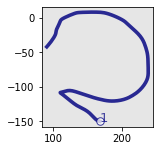

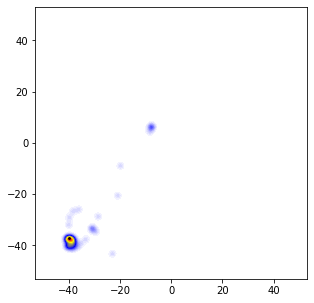

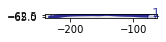

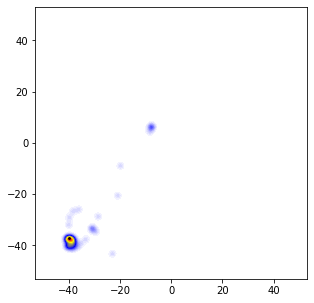

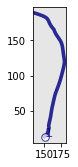

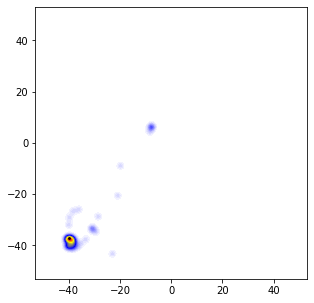

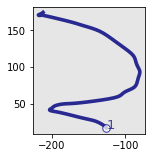

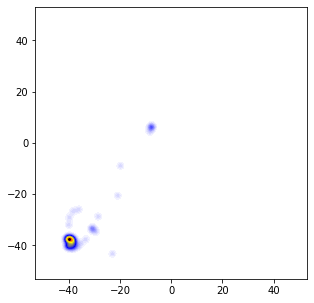

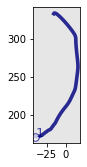

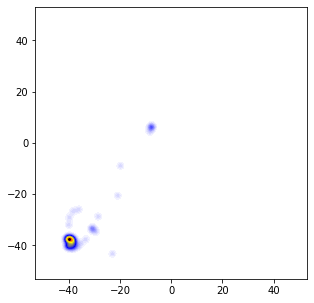

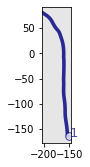

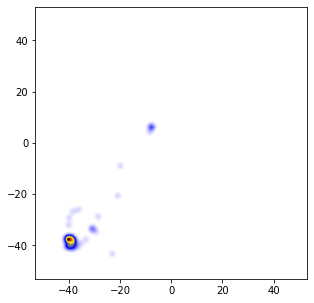

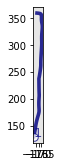

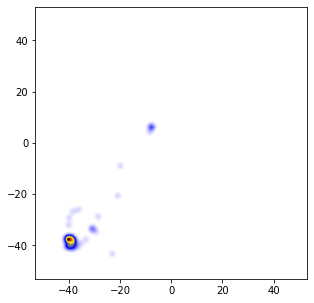

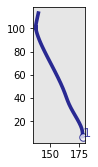

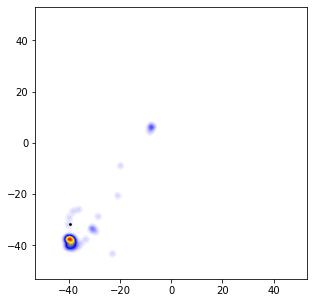

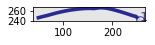

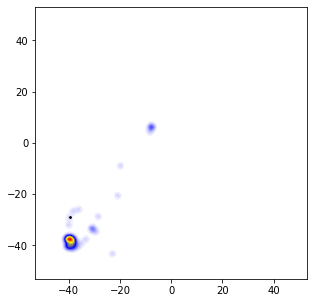

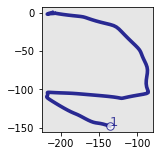

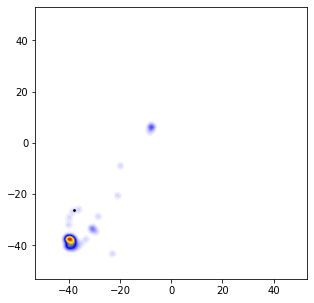

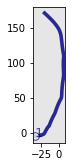

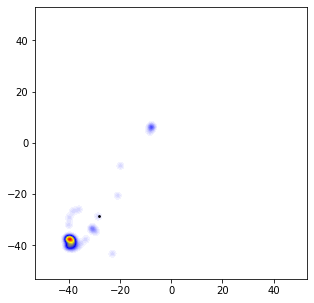

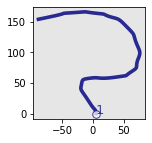

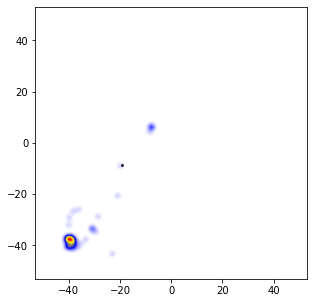

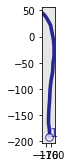

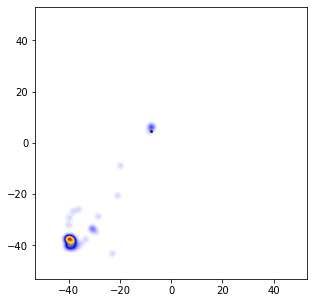

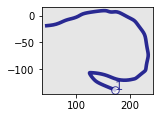

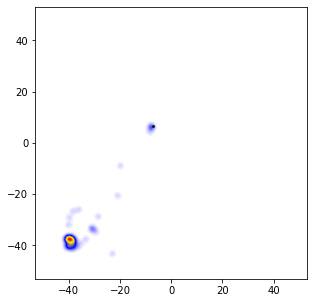

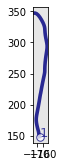

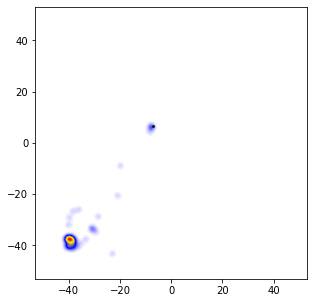

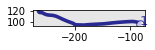

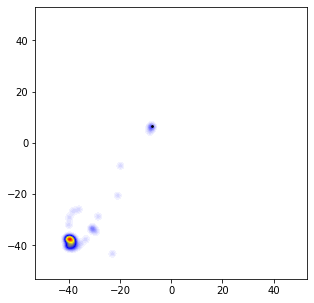

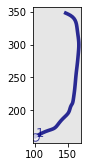

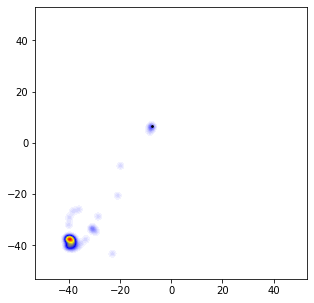

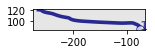

In [46]:



showing(1)

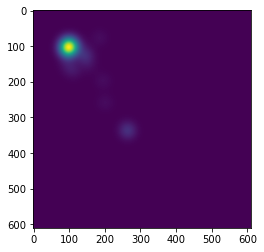

In [53]:
plt.figure()
plt.imshow(
wshedfile['density'])

In [ ]:
a.sort()

In [35]:
item = zValues[23]

In [32]:
zValues[23]

array([-22.4886972 , -43.06584412])

In [36]:
[i for i,z in enumerate(zValues) if np.all(np.isclose(z, item))]

[23]

In [42]:
np.where(np.all(zValues==item, axis=1))

(array([23], dtype=int64),)

In [43]:
np.argsort?

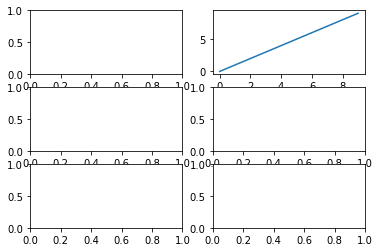

In [48]:
fig, axes = plt.subplots(3,2)
ax = axes[0][1]
ax.plot(np.arange(10), np.arange(10))

In [49]:
np.digitize?

In [ ]:
mmpy.motionmapper.fiale_embeddingSubSampling()

In [ ]:
dataTotal[1][0].shape

In [ ]:
#wlets, freqs = mmpy.findWavelets(projs_list[0], projs_list[0].shape[1], parameters.omega0, parameters.numPeriods, parameters.samplingFreq, parameters.maxF, parameters.minF, parameters.numProcessors, parameters.useGPU)
lwletsa = []
lfreqsa = []
for a in range(100):
    for b in range(len(dataTotal[a])):
        wlets, freqs = mmpy.findWavelets(dataTotal[a][b], dataTotal[a][b].shape[1], parameters.omega0, parameters.numPeriods, parameters.samplingFreq, parameters.maxF, parameters.minF, parameters.numProcessors, parameters.useGPU)
        #lwletsa.append(wlets)
        #lfreqsa.append(freqs)
        
        
        fig, axes = plt.subplots(2, 1, figsize=(20,18))
        for i, ax in enumerate(axes.flatten()):
            wletsModified = wlets[:300,25*i:25*(i+1)]
            ax.imshow(wletsModified.T, cmap='PuRd', origin='lower')
            ax.set_yticks([0, 5, 10, 15, 20, 24])
            ax.set_yticklabels(['%0.1f'%freqs[j] for j in [0, 5, 10, 15, 20, 24]])
            
            lwletsa.append(wletsModified)
            
            if i == 3:
                ax.set_ylabel("Frequencies (hz)", fontsize=14)
            ax.set_title('Projection #%i'%(i+1))
        ax.set_xlabel('Frames', fontsize=14)
    wletsa = np.array(lwletsa)
    freqsa = np.array(lfreqsa)
        
        
        
        

In [ ]:
wlets.shape

In [ ]:
freqs.shape

In [ ]:
wletsa.shape

In [ ]:
wlets[:300,25*2:25*(2+1)].T.shape

In [ ]:
wlets.T.shape

In [ ]:
wletsa[0].T.shape

In [ ]:
projectPath

In [ ]:
t1 = time.time()

mmpy.subsampled_tsne_from_projections(parameters, parameters.projectPath)

print('Done in %i seconds.'%(time.time()-t1))

In [ ]:
len(wletsa)

In [ ]:
len(wletsa.T)

In [419]:
sigma=2.0

m = 20


'''
_, xx, density = mmpy.findPointDensity(wletsa, sigma, 511, [-m-20, m+20])


fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].scatter(wletsa[:,0], wletsa[:,1], marker='.', c=np.arange(trainy.shape[0]), s=1)
axes[0].set_xlim([-m-20, m+20])
axes[0].set_ylim([-m-20, m+20])

axes[1].imshow(density, cmap=mmpy.gencmap(), extent=(xx[0], xx[-1], xx[0], xx[-1]), origin='lower')

'''
_, xx, density = mmpy.findPointDensity(wletsa, sigma, 200, [m-20, m+20])


fig, axes = plt.subplots(1, 2, figsize=(12,6))


for x in range(200):
        #_, xx, density = mmpy.findPointDensity(dataTotal[x][y], sigma, 511, [-m-20, m+20])
        axes[0].scatter(wletsa[x][:,0], wletsa[x][:,1], marker='.', c=np.arange(wletsa[x].shape[0]), s=1)
        #axes[1].imshow(density, cmap=mmpy.gencmap(), extent=(xx[0], xx[-1], xx[0], xx[-1]), origin='lower')


axes[0].set_xlim([m-20, m+20])
axes[0].set_ylim([m-20, m+20])







              
              
              
              
              


NameError: name 'wletsa' is not defined

In [ ]:
m = dataTotal[150][0].max()

In [ ]:
m = 500

In [ ]:
random = np.array([[1,2,3,4,5,6,7,8,9,10,11], 
                   [11,10,9,8,7,6,5,4,3,2,1]])

In [ ]:
random2 = np.array([1,2,3,4,5,6,7,8,9,10,11])

In [ ]:
random2 = random2.T

In [ ]:
random2.shape

In [ ]:
random2

In [ ]:
random

In [ ]:
random = random.T

In [ ]:
random.shape

In [ ]:
random

In [ ]:
a = int((random.shape[0])/4)

In [ ]:
a

In [ ]:
b = len(random)

In [ ]:
b

In [ ]:
c = random.shape[1]

In [ ]:
c

In [ ]:
x = random[a:b-a, 0:c]

In [ ]:
x

In [ ]:
y = random2[a:b-a]

In [ ]:
y

In [ ]:
inds = np.indices(y)

In [ ]:
inds

In [ ]:
lindependentStrokes = []
for x in range(50):
    for y in range(len(dataTotal[x])):
        temp = dataTotal[x][y]
        lindependentStrokes.append(temp)
independentStrokes = np.array(lindependentStrokes)

In [ ]:
len(independentStrokes[20])

In [ ]:
len(dataTotal[19][0])

In [ ]:

sigma = 2.0



fig, axes = plt.subplots(1, 2, figsize=(12,6))

#t_, txx, tdensity = mmpy.findPointDensity(independentStrokes, sigma, 511, [-m-20, m+20])

'''
ldensity = []
lxx = []
l_ = []
t_, txx, tdensity = mmpy.findPointDensity(dataTotal, sigma, 511, [-m-20, m+20])

for x in range(5):
    ldensityPartial = []
    lxxPartial = []
    l_Partial = []
    for y in range(len(dataTotal[x])):
        t_, txx, tdensity = mmpy.findPointDensity(dataTotal[x][y], sigma, 511, [-m-20, m+20])
        
        ldensityPartial.append(tdensity)
        lxxPartial.append(txx)
        l_Partial.append(t_)
    
    
    
    densityPartial = np.array(ldensityPartial)
    xxPartial = np.array(lxxPartial)
    _Partial = np.array(l_Partial)
    
    ldensity.append(densityPartial)
    lxx.append(xxPartial)
    l_.append(_Partial)
    
density = np.array(ldensity)
xx = np.array(xx)
_ = np.array(_)
    
axes[1].imshow(density, cmap=mmpy.gencmap(), extent=(xx[0][0], xx[0][-1], xx[0][0], xx[0][-1]), origin='lower')



for x in range(6):
    ldensity = []
    lxx = []
    l_ = []
    for y in range(len(dataTotal[x])):
        t_, txx, tdensity = mmpy.findPointDensity(dataTotal[x][y], sigma, 511, [-m-20, m+20])
        
        ldensity.append(tdensity)
        lxx.append(txx)
        l_.append(t_)
    
    density = np.array(ldensity)
    xx = np.array(lxx)
    _ = np.array(l_)
    
    axes[1].imshow(density[0][x], cmap=mmpy.gencmap(), extent=(xx[0][0], xx[0][-1], xx[0][0], xx[0][-1]), origin='lower')
'''
for x in range(500):
    for y in range(len(dataTotal[x])):
        #_, xx, density = mmpy.findPointDensity(dataTotal[x][y], sigma, 511, [-m-20, m+20])
        axes[0].scatter(dataTotal[x][y][:,0], dataTotal[x][y][:,1], marker='.', c=np.arange(dataTotal[x][y].shape[0]), s=1)
        #axes[1].imshow(density, cmap=mmpy.gencmap(), extent=(xx[0], xx[-1], xx[0], xx[-1]), origin='lower')


axes[0].set_xlim([-m-20, m+20])
axes[0].set_ylim([-m-20, m+20])

#axes[1].imshow(density, cmap=mmpy.gencmap(), extent=(xx[0], xx[-1], xx[0], xx[-1]), origin='lower')




In [ ]:
density[0][0]

In [ ]:
len(xx[0])